# A Small Explanation of Backpropagation

## Initialization

In [1]:
import numpy as np
from IPython.display import Image

Want first to train one layer network which tries to predict  
output 
$$
 y = f(\vec x) = f(x_1, x_2, x_3)
$$

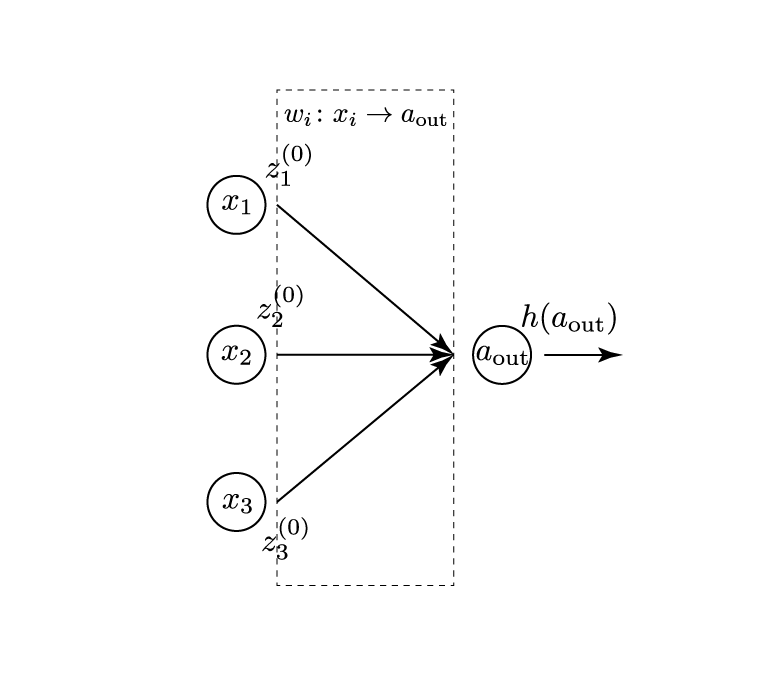

In [2]:
Image( filename = "one_layer_net.png", width = 600 )

In [9]:
# input 
X = np.array([ [0,0,2],
              [0,1,1],
              [1,0,1],
              [1,1,1] ])

y = np.array([[0,0,1,1]]).T

Now the rows of the matrix $X$ are 4 "datapotins":
$$
    X = \begin{pmatrix}
    x^{(1)}_1 \; \; x^{(1)}_2 \; \; x^{(1)}_3 \\
    x^{(2)}_1 \; \; x^{(2)}_2 \; \; x^{(2)}_3 \\
    x^{(3)}_1 \; \; x^{(3)}_2 \; \; x^{(3)}_3 \\
    x^{(4)}_1 \; \; x^{(4)}_2 \; \; x^{(4)}_3 \\
    \end{pmatrix}
      =\begin{pmatrix} \vec x^{(1)} \\ \vec x^{(2)} \\ \vec x^{(3)} \\ \vec x^{(4)} \\ \end{pmatrix}
$$

In [10]:
print 'X = \n', X
print '\n'
print 'y = \n', y

X = 
[[0 0 2]
 [0 1 1]
 [1 0 1]
 [1 1 1]]


y = 
[[0]
 [0]
 [1]
 [1]]


Pay attention: obviously $f(\vec{x})$ *might be* linear function of inputs, obviously with the first weight 1 and two others 0:
$$
    f(\vec{x}) = 1 \cdot x_1 + 0 \cdot x_2 + 0 \cdot x_3
$$

We utilize sigmoid activation function:
$$
    h(a) = \frac{1}{1 + e^{-a}}
$$

In [11]:
# sigmoid function
def nonlin( x, deriv = False ):
    if( deriv == True ):
        return x * ( 1 - x )
    return 1/( 1 + np.exp( -x ) )

In [12]:
# seed random numbers to make calculation deterministic
np.random.seed( 1 )

## One Layer Back-Propagation

In [13]:
# initialize weights uniformly randomly with mean 0
syn0 = 2*np.random.random( (3,1) ) - 1

So the weights are a vector: 
$$
\vec{w} = \begin{pmatrix} w_{11}\\ w_{12} \\ w_{13} \end{pmatrix}  \qquad \text{notation $w_{ji} = z_i \to a_j$}
$$

In [14]:
# weights (syn stands for 'synaps' here)
print syn0

[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


### Prerequisites/Refresher

We assume quadratc loss: $E = \frac{1}{2} \Bigl(h(a_1) - y\Bigr)^2$, this means that the initial **error** looks like
$$
    \delta_1 = \frac{\partial E}{\partial a_1} = h'(a_1) \cdot \Bigl(h(a_1) - y\Bigr)
$$

The respecive gradient component
$$
    \nabla_{ji} E \equiv \frac{\partial E}{\partial w_{ji}} = \delta_j \cdot z_i
$$

### Now Run Back-Propagation

In [9]:
# Back-propagation
for iter in xrange( 10000 ):

    # forward propagation of the result for all four 
    #  data rows simultaneously
    l0 = X
    l1 = nonlin( np.dot( l0, syn0 ) )

    # how much did we miss?
    l1_error = l1 - y

    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin( l1, True )

    # update weights in the direction of gradient
    syn0 += - np.dot( l0.T, l1_delta )

The output 

In [10]:
# weights
print syn0

[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]


In [11]:
# output
l0 = X
l1 = nonlin( np.dot( l0, syn0 ) )
print l1

[[ 0.009664  ]
 [ 0.00786466]
 [ 0.99358931]
 [ 0.99211997]]


**Works! Additional things to see:**
- Change the speed of convergence?

**Question**
Remember that the guessed that the weights are $(1,0,0)$, why have we obtained smth else?

**Answer**
Sigmoid function as activation function. Could we use linear (i.e. identity) $h(a) = a$?

Let's try!

### Back-Prop with identity activation

In [12]:
# identity function
def ident_activation( x, deriv = False ):
    if( deriv == True ):
        return 1
    return x

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1

for iter in xrange(10000):

    # forward propagation
    l0 = X
    l1 = ident_activation( np.dot( l0, syn0 ) )
    
    # how much did we miss?
    l1_error = l1 - y
        
    # multiply how much we missed by the 
    # slope of the activation at the values in l1
    l1_delta = l1_error * ident_activation( l1, True )
        
    # update weights 
    syn0 += - 0.1 * np.dot( l0.T, l1_delta ) # don't ask why we need 0.1! 

In [13]:
# weights
print syn0

[[  1.00000000e+00]
 [  5.12930596e-31]
 [ -4.44089210e-16]]


In [14]:
# output
l0 = X
l1 = ident_activation( np.dot( l0, syn0 ) )
print l1

[[ -4.44089210e-16]
 [ -4.44089210e-16]
 [  1.00000000e+00]
 [  1.00000000e+00]]


**Works!**

So replacing the sigmoid function by identity worked **in this case** (JUST FOR DEMONSTRATION). Obviously this type of output is too unflexible!

**Question** 
Which type of Gradient Descent was used here?

**Answer**

See how the gradients are computed and weights are updated:

    l0 = X  # -----> here we use ALL data rows
    l1 = nonlin( np.dot( l0, syn0 ) )

    syn0 += - np.dot( l0.T, l1_delta )  # -----> we actually summed up all the rows!

This product of matrix $X$ and vector $\vec{\delta}$ means

$$
    \vec{w}_{k+1} = \vec{w}_k - \Biggl[ 
        \nabla E \bigl(\vec{x}^{(1)} \bigr) 
        + \nabla E\bigl(\vec{x}^{(2)} \bigr) 
        + \nabla E\bigl(\vec{x}^{(3)} \bigr) 
        + \nabla E\bigl(\vec{x}^{(4)} \bigr) \Biggr]
$$

### Now what if we do SGD (randomly choose online Grad Descent)?

In [15]:
for iter in xrange( 50000 ):

    rand_index = np.random.randint( 4 )
    
    # forward propagation with ONLY ONE datapoint X
    l0 = X[rand_index].reshape(1,3)
    l1 = nonlin( np.dot( l0, syn0 ) )  # now one-dim
    
    # how much did we miss?
    l1_error = l1 - y[rand_index]  # now one-dim
    
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin( l1, True )

    # update weights
    syn0 += -np.dot( l0.T, l1_delta )

In [16]:
# weights
print syn0

[[ 9.90263399]
 [-0.20864662]
 [-4.74026187]]


In [17]:
# output
l0 = X
l1 = nonlin( np.dot( l0, syn0 ) )
print l1

[[ 0.0086607 ]
 [ 0.00704121]
 [ 0.99430453]
 [ 0.99299238]]


**Works!**

## Harder Problem — No Easy Solution

In [18]:
# input 
X = np.array([ [0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1] ])

y = np.array([[0,1,1,0]]).T

In [19]:
print 'X = \n', X
print '\n'
print 'y = \n', y

X = 
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]


y = 
[[0]
 [1]
 [1]
 [0]]


Try to run the **one-layer** code

In [20]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
syn0 = 2 * np.random.random((3,1)) - 1

# Back-propagation
for iter in xrange( 10000 ):

    # forward propagation of the result for all four 
    #  data rows simultaneously
    l0 = X
    l1 = nonlin( np.dot( l0, syn0 ) )

    # how much did we miss?
    l1_error = l1 - y

    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin( l1, True )

    # update weights in the direction of gradient
    syn0 += - np.dot( l0.T, l1_delta )

In [21]:
# output
l0 = X
l1 = nonlin( np.dot( l0, syn0 ) )
print l1

[[ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]]


Looks like he puts all weights to 0?

In [22]:
# weights
print syn0

[[  2.08166817e-16]
 [  2.22044605e-16]
 [ -3.05311332e-16]]


Yes, all weights 0: we can't learn such function!
Need something more complicated: two layers?

### Two Layers for Harder Problem

We hope that two layers can learn the necessary function.

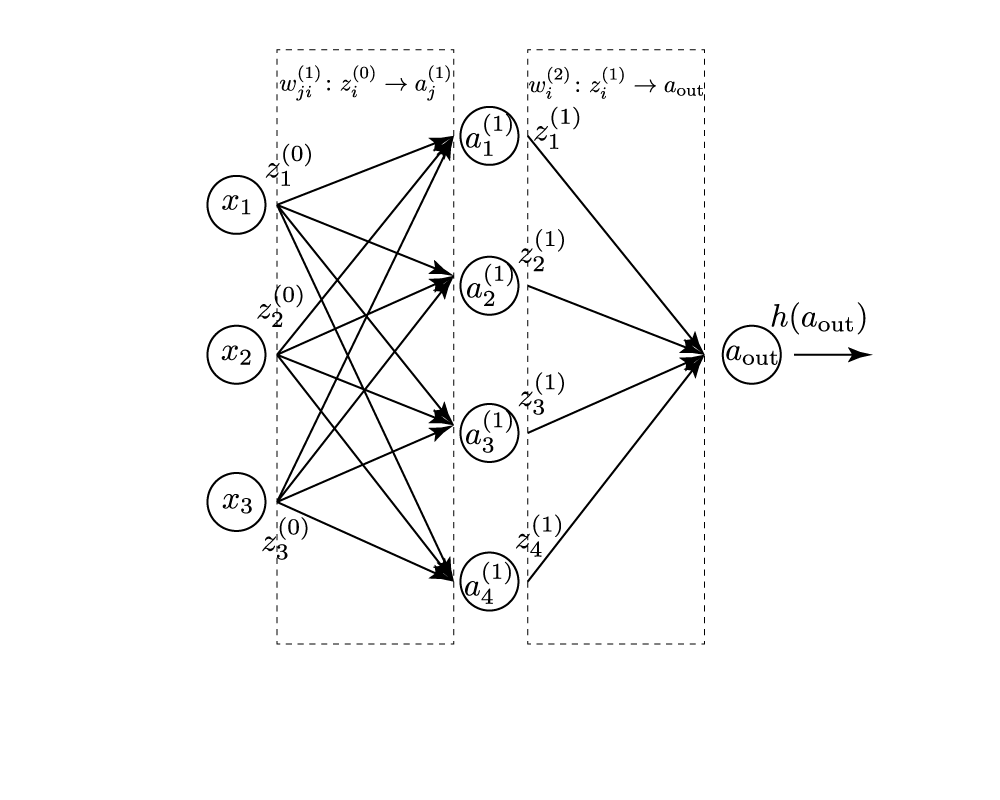

In [23]:
Image( filename = "two_layer_net.png", width = 600 )

In [24]:
# input 
X = np.array([ [0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1] ])

y = np.array([[0,1,1,0]]).T

print 'X = \n', X
print '\n'
print 'y = \n', y

np.random.seed(1)

number_hidden_neurons = 4

# randomly initialize our weights with mean 0
syn0 = 2*np.random.random( (3, number_hidden_neurons) ) - 1
syn1 = 2*np.random.random( ( number_hidden_neurons,1 ) ) - 1

for j in xrange( 100000 ):

	# Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = nonlin( np.dot( l0, syn0 ) )
    l2 = nonlin( np.dot( l1, syn1 ) )

    # how much did we miss the target value?
    l2_error = l2 - y
    
    if ( j % 10000 ) == 0:
        print "Error STEP " + str( j ) + ":  " +  str( np.mean( np.abs(l2_error) ) )
        
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error * nonlin( l2, deriv = True )

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot( syn1.T )
    
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin( l1, deriv = True )

    syn1 += - l1.T.dot( l2_delta )
    syn0 += - l0.T.dot( l1_delta )

X = 
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]


y = 
[[0]
 [1]
 [1]
 [0]]
Error STEP 0:  0.496410031903
Error STEP 10000:  0.00858452565325
Error STEP 20000:  0.00578945986251
Error STEP 30000:  0.00462917677677
Error STEP 40000:  0.00395876528027
Error STEP 50000:  0.00351012256786
Error STEP 60000:  0.00318350238587
Error STEP 70000:  0.00293230634228
Error STEP 80000:  0.00273150641821
Error STEP 90000:  0.00256631724004


In [25]:
# output
print l2

[[ 0.00199094]
 [ 0.99751458]
 [ 0.99771098]
 [ 0.00294418]]


**Works!**

<img src="files/success_baby.jpg" width = "400">

### Questions

- Try to change the number of hidden neurons to 10? to 2? What happens?

## What about Drop-Out?

It switches off certain (random on each step) hidden neurons so that they don't propagate computation **forward**. This hopefully reduces some of the computation associated with them (for large nets). **During backward step** we keep them!

In [26]:
print 'X = \n', X
print '\n'
print 'y = \n', y

X = 
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]


y = 
[[0]
 [1]
 [1]
 [0]]


In [27]:
np.random.seed(1)

number_hidden_neurons = 4

# randomly initialize our weights with mean 0
syn0 = 2*np.random.random( ( 3, number_hidden_neurons ) ) - 1
syn1 = 2*np.random.random( ( number_hidden_neurons, 1 ) ) - 1

for j in xrange( 100000 ):

    # Feed forward through layers 0, 1, and 2 
    # WITH Drop-Out 
    
    l0 = X
    l1 = nonlin( np.dot( l0, syn0 ) )
    
    # Magic
    l1_drop = l1
    for k in range( len( l1 ) ):
        if np.random.random() < 0.2:
            l1_drop[k] = 0.0
    
    l2 = nonlin( np.dot( l1_drop, syn1 ) )

    # how much did we miss the target value?
    l2_error = l2 - y
    
    if ( j % 10000 ) == 0:
        print "Error STEP " + str( j ) + ":  " +  str( np.mean( np.abs(l2_error) ) )
        
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error * nonlin( l2, deriv = True )

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot( syn1.T )
    
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin( l1, deriv = True )

    syn1 += - l1.T.dot( l2_delta )
    syn0 += - l0.T.dot( l1_delta )

Error STEP 0:  0.49619315376
Error STEP 10000:  0.131834498105
Error STEP 20000:  0.00660730539334
Error STEP 30000:  0.00526422501944
Error STEP 40000:  0.00449259810269
Error STEP 50000:  0.127981329241
Error STEP 60000:  0.375855658433
Error STEP 70000:  0.251508012642
Error STEP 80000:  0.251371984684
Error STEP 90000:  0.12700962344


**Notice** Obviously tries to regularize (notice error goes back to some level)! However solves correctly:

In [28]:
# output
print l2

[[ 0.0022532 ]
 [ 0.99727598]
 [ 0.99737811]
 [ 0.00336391]]


*A. Gronskiy, Based on http://iamtrask.github.io/2015/07/12/basic-python-network/, revised, refactored*

# Appendix: Additional Stuff 

## Tanh Activation? 
Back to one-layer, simple problem, just to demonstrate tanh (shifted and scaled to imitate 0-1 step) activation:

$$
    h(a) = \frac{1}{2}\Bigl(\tanh(a) + 1\Bigr)
$$

In [29]:
# input 
X = np.array([ [0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1] ])

y = np.array([[0,0,1,1]]).T

print 'X = \n', X
print '\n'
print 'y = \n', y

# tanh function
def tanh_activation( x, deriv = False ):
    if( deriv == True ):
        return 0.5 * ( 1 - x * x )
    return 0.5 * (np.exp(x) - np.exp(-x))/( np.exp(x) + np.exp( -x ) ) + 0.5


# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1

# Back-propagation
for iter in xrange( 30000 ):

    # forward propagation of the result for all four 
    #  data rows simultaneously
    l0 = X
    l1 = tanh_activation( np.dot( l0, syn0 ) )

    # how much did we miss?
    l1_error = l1 - y

    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * tanh_activation( l1, True )

    # update weights in the direction of gradient
    syn0 += - np.dot( l0.T, l1_delta )

X = 
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]


y = 
[[0]
 [0]
 [1]
 [1]]


In [30]:
# Weights
print syn0

[[ 7.88724422]
 [-0.1875984 ]
 [-4.95679531]]


In [31]:
# Output
print l1

[[  4.94965918e-05]
 [  3.40123090e-05]
 [  9.97159360e-01]
 [  9.95871418e-01]]
